# Data Science 100 Final Project Report
Exploration of How Playing Time and Age Relates to a Player's Experience Level

**Introduction:**

Minecraft is a popular gaming platform that allows its users to build, customize and explore worlds in different modes. A research group at UBC in the Computer Science department was led by Frank Wood in order to have recorded player actions and other data as they played on a designated Minecraft server. The objective of collecting this data was to explore how people play videogames, but several questions of interest regarding player behaviour and characteristics arise to help refine this research process. The focus of the following report is to explore the question: Can the combination of individual playing times and age be used to predict a players experience level in the players.csv dataset? The intended result of answering this question is to create a functional classification model that can ideally be trained by the dataset to accurately predict a players experience level based on their playing time and age. This, in turn can allow the research group to focus recruiting efforts on groups of specific ages and experience levels that contribute the most amount of data to the research. 

As previously indicated, this report will be utilizing the players.csv dataset, a 7 column table with 196 recorded observations. The 7 variables included in the table are:

`experience` = Experience level of player (factor)

`subscribe` = If the player is subscribed to a game-related newsletter (logical)

`hashedEmail` = The hashed (encrypted) email of the player (character)

`played_hours` = Number of hours played (double)

`name` = The players name (character)

`gender` = The players gender (factor)

`Age` = Age of the player (integer)

As is, the dataset is in a relatively tidy format that will allow for effective data analysis to occur - each row is a single observation, each column is a single variable, and each value is in a single cell. A potential issue may be in how the dataset is read in by R, where the variable type could be misinterpreted - however such issues can be dealt with as they arise.

**Methods & Results:**

The process of studying this data must begin with loading the necessary packages to be able to perform the analysis. We will likely find the tidyverse, tidymodels, and repr packages useful, and will additionally mandate that R only shows a preview of 10 rows of the dataset when loaded into the notebook.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 10)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Now that the packages are successfully loaded, we must read in the data from players.csv, which should be downloaded to the working directory in advance. We will then assign the dataset to a variable called `players` for clarity.

In [2]:
players <- read_csv("players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17


As expected, R has not predicted the experience, gender and age variable types correctly. While all of these variables may not necessarily be used, it is best practice to use the `mutate` function in order to change them all to the correct type so the data analysis can proceed as intended.

In [3]:
players <- players |>
    mutate(experience = as_factor(experience), gender = as_factor(gender), Age = as.integer(Age))
players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17


In order to gain a sense of the patterns the data and if there is actually any correlation between played hours and age with experience level, a scatterplot should be created to visualize the relationship between played hours and aged - separated with color by the experience level. This will be called `player_plot`

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


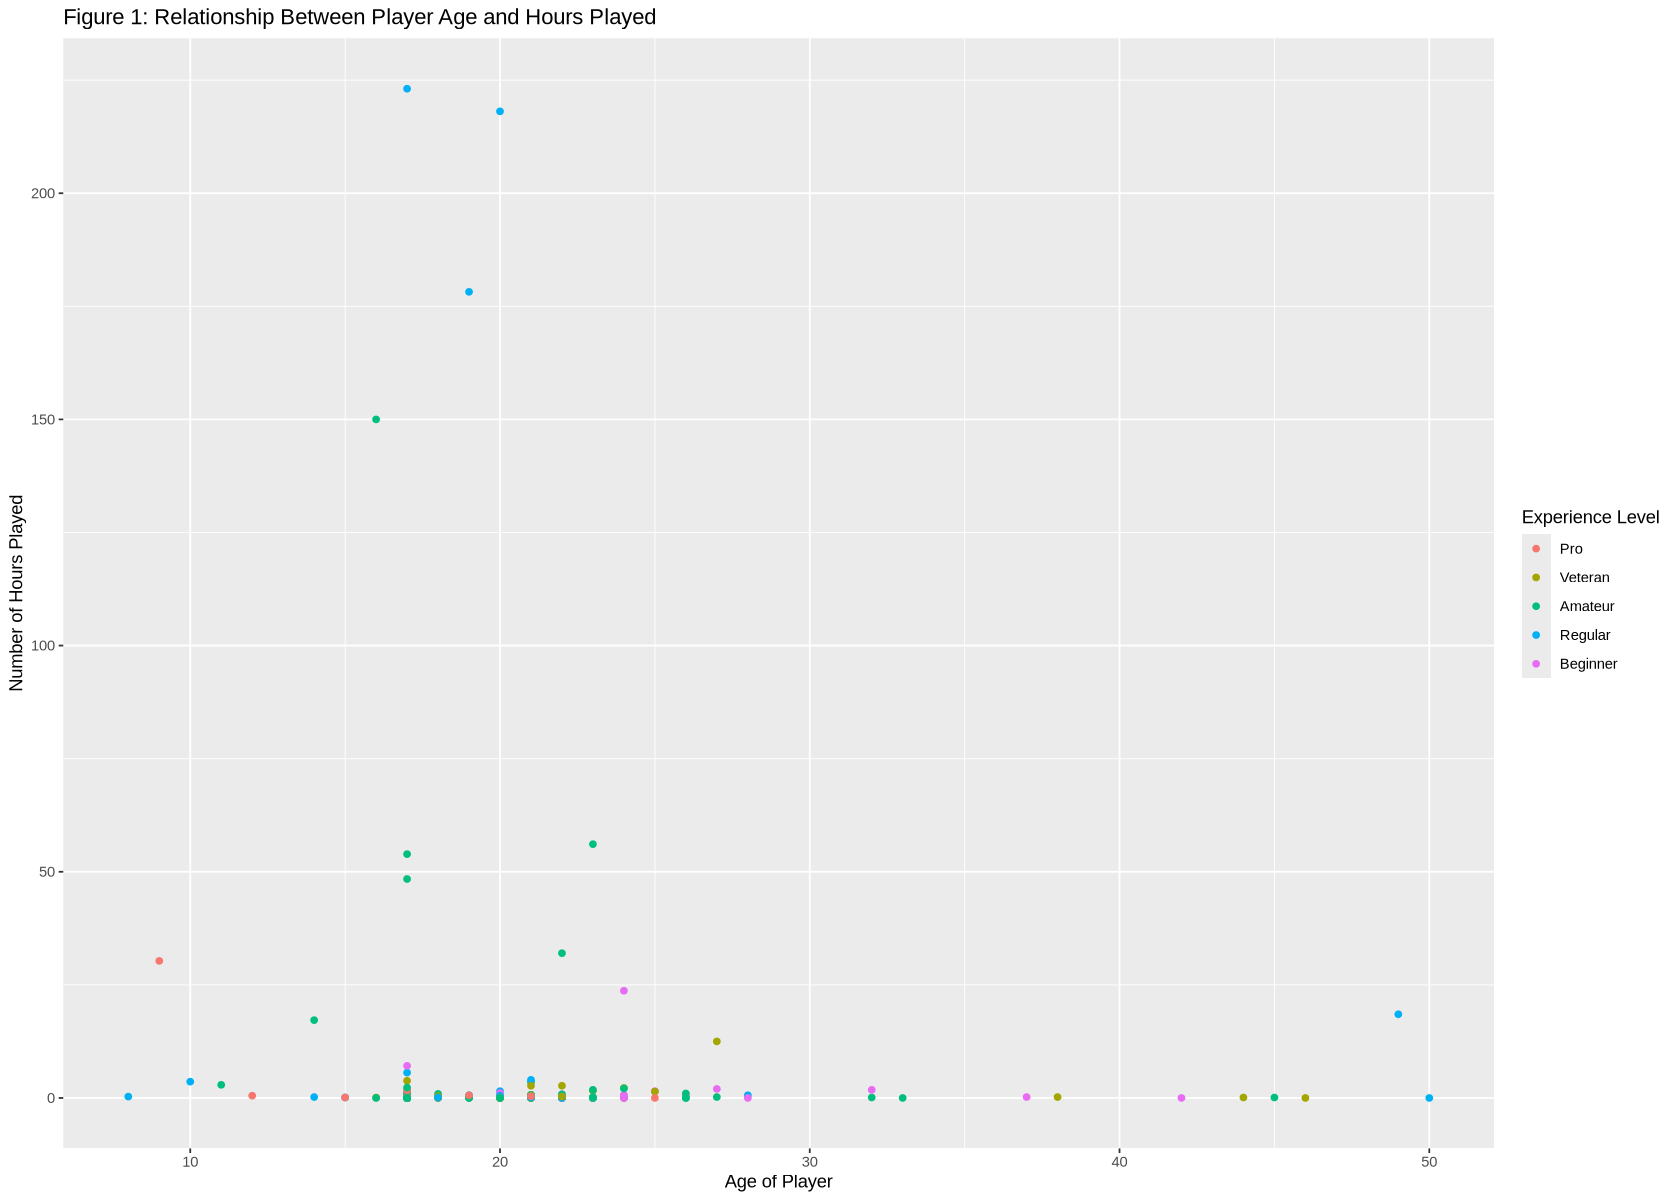

In [4]:
options(repr.plot.width = 14, repr.plot.height = 10)

player_plot <- players |>
    ggplot(aes(x = Age, y = played_hours, color = experience)) +
    geom_point() +
    labs(x = "Age of Player", y = "Number of Hours Played", title = "Figure 1: Relationship Between Player Age and Hours Played", color = "Experience Level")
player_plot

Looking at Figure 1 above, the large variations in number of hours makes it difficult to interpret any trends and differences in the overall data. When approaching actual classification problems, we will attempt to scale and center the dataset so that the values ideally show a more clear distribution. Before this however, it may be useful to view and compare the mean age and number of played hours for each experience level to get an initial sense of the averages for each group. To make it easier to visualize patterns, the table will also be reordered from lowest experience level to highest - Beginner, Amateur, Regular, Pro, and Veteran.

In [5]:
player_means <- players |>
    group_by(experience) |>
    summarize(mean_played_hours = mean(played_hours, na.rm = TRUE), mean_age = mean(Age, na.rm = TRUE))  |>
    mutate(experience = factor(experience, levels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran"))) |>
    arrange(experience)
player_means

experience,mean_played_hours,mean_age
<fct>,<dbl>,<dbl>
Beginner,1.2485714,21.65714
Amateur,6.0174603,20.25397
Regular,18.2083333,20.60000
Pro,2.6000000,16.92308
Veteran,0.6479167,20.95833


Based on the mean values found above, as well as the distribution, it may already appear that the variables `played_hours` and `Age` may NOT be able to create an effective model for predicting experience level - since `mean_played_hours` increases with experience level until Regular where it starts to decrease, while `mean_age` seems to remain around 20 with the exception of the Pro category. Regardless, we will proceed with our analysis of the data to test if our assumptions are truly correct or not.

To do so, we will be building a knn classification model - as our intention is to predict a categorical response variable based on two given numerical explanatory variables. To best test the performance of the model on unseen data, we will be splitting our data into training and test data, and performing cross validation to pick the best value of k for the k-nearest neighbours algorithm. This process, alongside a number of other foundational steps will be used in order to analyze the patterns in the `players` dataset. We'll start by selecting only the columns we need from the entire dataset in order to better analyze it.

In [6]:
players_selected <- players |>
    select(experience, played_hours, Age)
players_selected

experience,played_hours,Age
<fct>,<dbl>,<int>
Pro,30.3,9
Veteran,3.8,17
Veteran,0.0,17
Amateur,0.7,21
Regular,0.1,21
⋮,⋮,⋮
Amateur,0.0,17
Veteran,0.3,22
Amateur,0.0,17


Next, we will take this data and split it to create an individual training set for building the model and a testing set for evaluating its performance. Before any data analysis is to occur however, we will set a seed value to ensure "reproducable randomness".

In [7]:
set.seed(2000) 

players_split <- initial_split(players_selected, prop = 0.75, strata = experience)
players_training <- training(players_split)
players_testing <- testing(players_split)

Next, we will create an initial model and a recipe to start the analysis of the data. The recipe will center and scale the data in order to put all the points on a comparable scale.

In [8]:
players_recipe <- recipe(experience ~ played_hours + Age, data = players_training) |>
    step_center(all_predictors()) |>
    step_scale(all_predictors())

players_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

With these created, the next steps are creating a vfold (specifying the parameters of a 5 fold cross-validation), a set of possible k-values to test (which we've picked to be from 1-10), and a workflow that applies all these individual contributors to gain a sense of the best k-values.

In [9]:
players_vfold <- vfold_cv(players_training, v = 5, strata = experience)

k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

knn_best <- workflow() |>
               add_recipe(players_recipe) |>
               add_model(players_tune) |>
               tune_grid(resamples = players_vfold, grid = k_vals) |>
               collect_metrics()
knn_best

#Error messages will appear when running the code for this workflow, they do not affect the performance of the model so they can be disregarded. 

→ A | warning: ✖ No observations were detected in `truth` for level: Pro.
               ℹ Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

→ B | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 27 rows.
               ✖ Assigned data has 28 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 28 to size 27.

There were issues with some computations   A: x1
There were issues with some computations   A: x1   B: x1

→ C | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 26 rows.
               ✖ Assigned data has 27 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 27 to size 26.

There we

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.2523297,3,0.027041342,Preprocessor1_Model01
1,roc_auc,hand_till,0.4964616,3,0.004668792,Preprocessor1_Model01
2,accuracy,multiclass,0.2634409,3,0.031843211,Preprocessor1_Model02
2,roc_auc,hand_till,0.5564866,3,0.027686580,Preprocessor1_Model02
3,accuracy,multiclass,0.2741935,3,0.026036904,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
8,roc_auc,hand_till,0.5411053,3,0.03800735,Preprocessor1_Model08
9,accuracy,multiclass,0.2731183,3,0.07311828,Preprocessor1_Model09
9,roc_auc,hand_till,0.5339303,3,0.03834328,Preprocessor1_Model09


The main interest of these metrics is the k-value or `neighbors`, and the `mean` specifically when `.metric` is accuracy. We will take the necessary steps to filter and select the desired data from all these metrics and visualize it in a plot to show us exactly which k value provides the most accuracy.

neighbors,mean
<dbl>,<dbl>
1,0.2523297
2,0.2634409
3,0.2741935
4,0.2523297
5,0.2523297
6,0.2408602
7,0.2301075
8,0.2301075
9,0.2731183


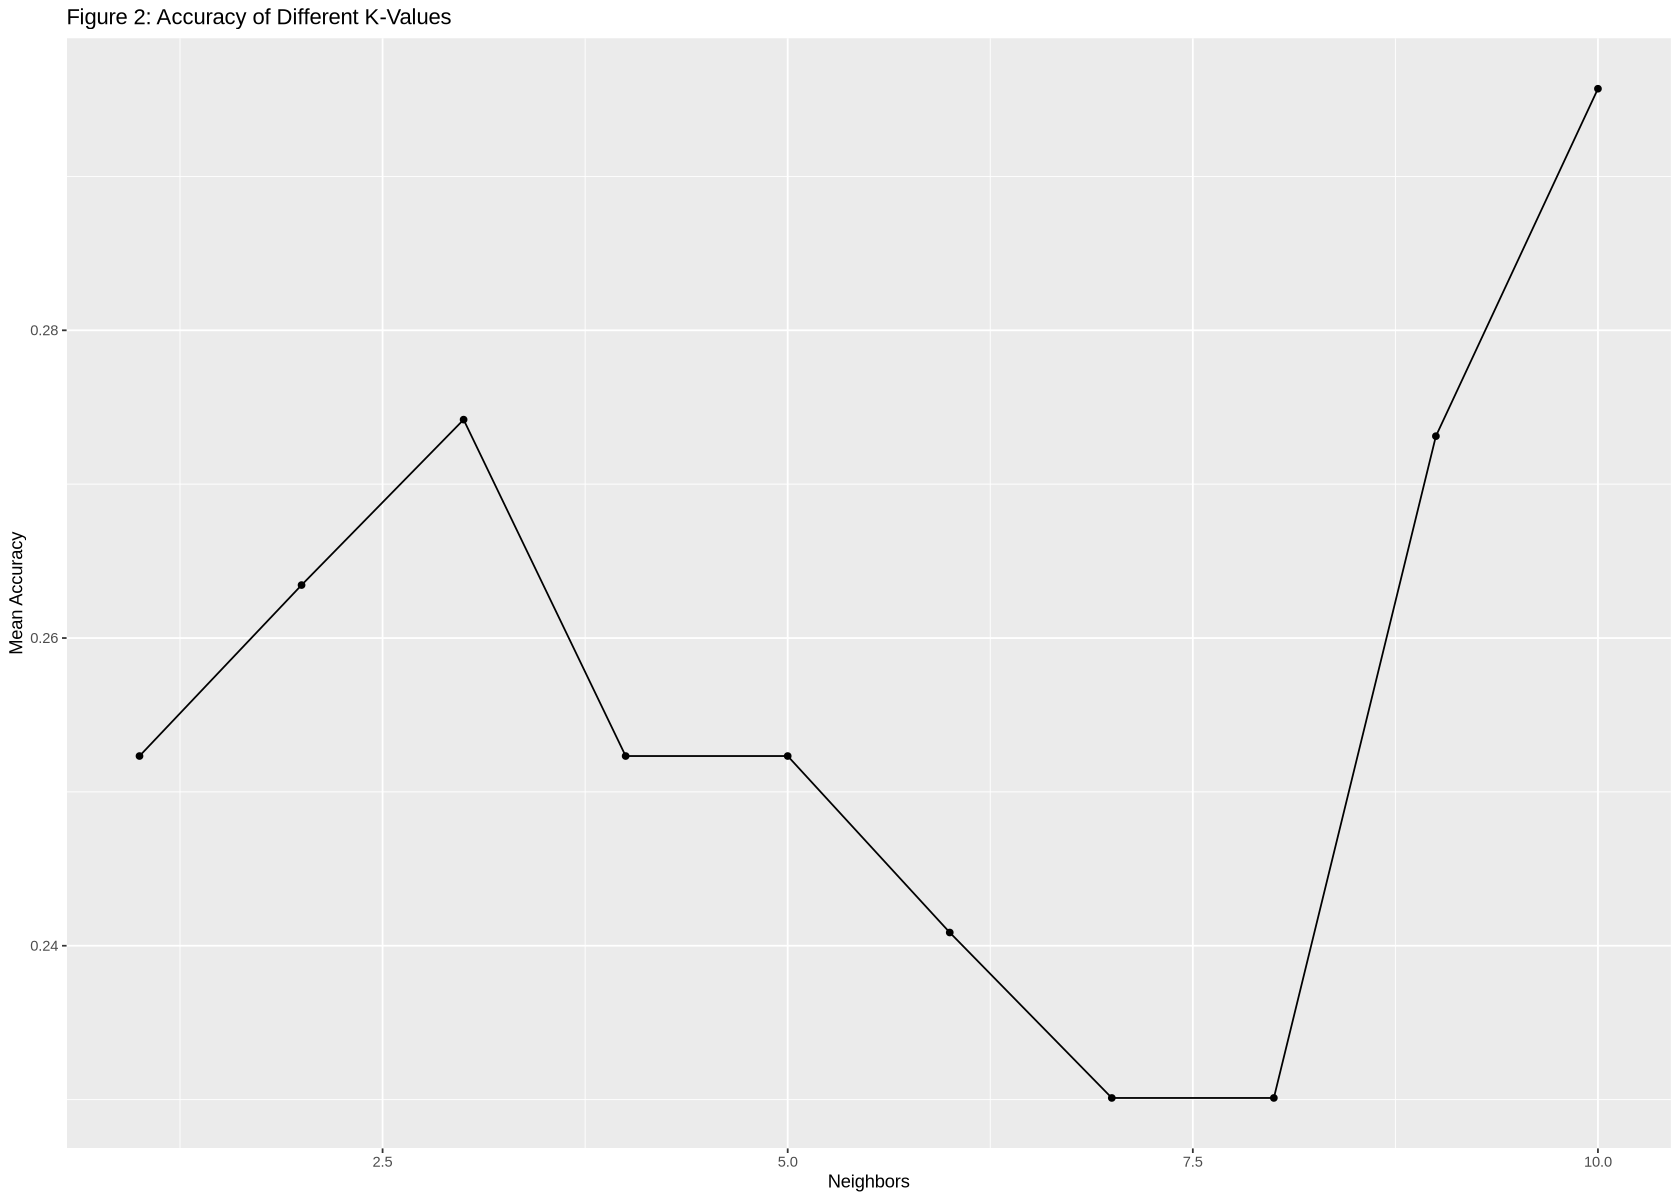

In [10]:
accuracy_metrics <- knn_best |>
    filter(.metric == "accuracy") |>
    select(neighbors, mean)
accuracy_metrics

accuracy_plot <- accuracy_metrics |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Mean Accuracy", title = "Figure 2: Accuracy of Different K-Values")
accuracy_plot

Based on the filtered metrics and Figure 2 above, it appears that k = 10 provides the most accuracy in our analysis of the `players_training` data. This then, is the value we will use in our analysis of all the data moving forward. Now, we must retrain our original model with this optimized k-value so that it can go on to actually predict experience levels. We will also create a new workflow with this model and fit it to the data to finalize the preparation.

In [11]:
players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 10) |>
            set_engine("kknn") |>
            set_mode("classification")

players_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec) |>
    fit(data = players_training)
players_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_center()
• step_scale()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(10,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.7222222
Best kernel: rectangular
Best k: 10

With a fully trained and fit model, we are ready to use it on the testing data we set aside at the beginning of the analysis process. We will predict the experience level of the players in the test data - of which we already know the true experience levels - bind these predictions to the original table, and collect the metrics to gain a sense of how well the model performed on data it had never seen before.

In [12]:
players_predictions <- predict(players_fit, players_testing) |>
    bind_cols(players_testing)
players_predictions

prediction_metrics <- players_predictions |>
    metrics(truth = experience, estimate = .pred_class)
prediction_metrics

.pred_class,experience,played_hours,Age
<fct>,<fct>,<dbl>,<int>
Veteran,Regular,0.1,21
Regular,Regular,0.0,19
Veteran,Amateur,0.0,21
Amateur,Amateur,48.4,17
Amateur,Amateur,0.1,17
⋮,⋮,⋮,⋮
Beginner,Amateur,2.1,24
Amateur,Veteran,0.1,44
Amateur,Beginner,0.0,17


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.30000000
kap,multiclass,0.02398215


**Discussion**

The present analysis set out to analyze the provided players.csv dataset, explore existing patterns, and use the knn-classification approach to build and tune a model that could effectively predict the experience level of players in the data based solely off of their recorded age and the number of hours they played on the designated Minecraft server. The objective in doing so was to determine whether or not such predictors could accurately be used to pinpoint specific experience levels so the research team can focus future efforts in recruiting volunteers that fit specific age or experience parameters.

Based on the results found in the last step of analysis above, the expected issue previously highlighted in the initial inspection of the `players.csv` data has infact affected the success of the classification model. k-nearest neighbours is an algorithm that makes no assumptions about how the dataset should look or about the variables as a whole. It simply measures distances between new data and existing data and uses the "majority vote" to decide what the new observation should be classified as. When the data that this model is fitted to has no clear groupings/trends associated with each class, there is no effective or accurate way it can predict NEW observations.

Seeing that there was no real relationship between age, played hours, and experience level (Figure 1) was an early indicator that even with scaling, centering, and optimization of the k value chosen, the knn-classification model would fail to accurately predict experience. After cross validation and choosing the k that best maximized accuracy, fitting this to the training data, and using the complete model to predict the experience of players in the testing data - the performance fell short as expected, with an accuracy of about 30%. Had there been a stronger relationship between the variables used to predict this experience level, it is expected that the model would perform far better - however as is, it is not of use to the research team in their endeavors to improve recruiting tactics.

Future research should be done to explore other variables contained within the dataset to see if stronger relationships can be found, some examples being:

 - Does gender and age affect playing time?
 - Can age and playing time predict whether or not they will subscribe to a game-related newsletter?

Another approach would be to study the data in `sessions.csv`, another provided dataset that focuses more on the play sessions of individual players - providing potential insight into the most common playing times of the day. Regardless of the analytical approach, the main objective should always remain clear - to gain a greater overall understanding of how users across the world play games.